In [1]:
import sathelpers

Open up our reduced/cleaned TLE data. This is clipped to the AIS data ranges plus or minus a couple of weeks.

In [2]:
# scan for all the unique id's in our extracted dataset
h5path = "/data/Indexed_TLE/reduced.h5"
all_ids = sathelpers.get_all_ids(h5path)
print("Loaded %i unique norad identifiers" % len(all_ids))



Loaded 19404 unique norad identifiers


Lets really quick check that the windows we compute and the trajectories meet end-to-end for a semi-random data point

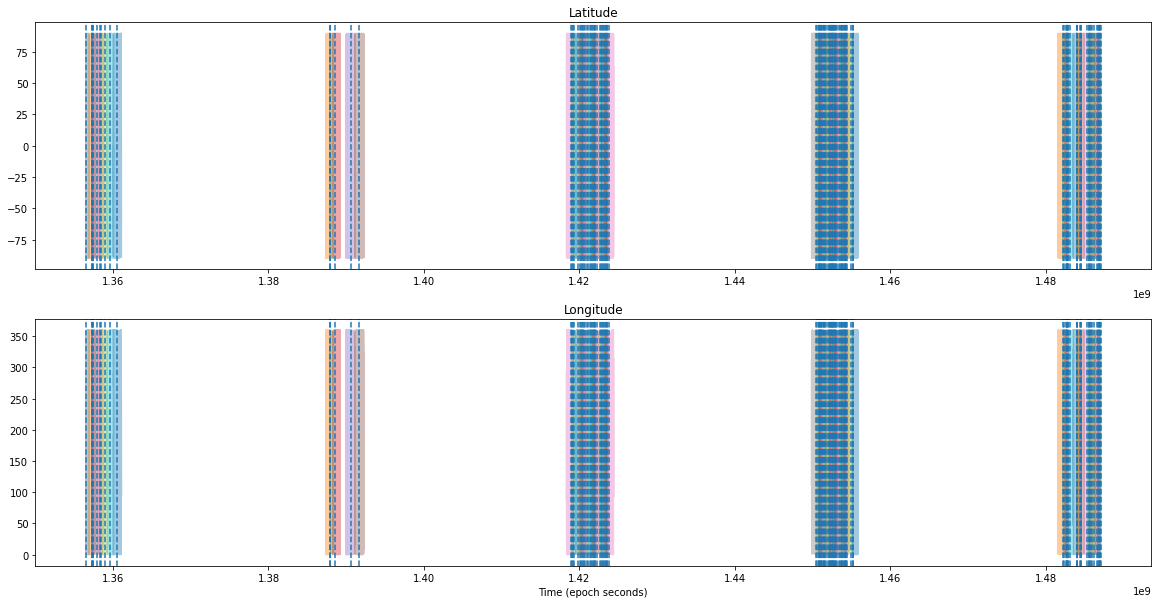

In [3]:
import matplotlib.pyplot as plt


def test_demo_plots(norad_id: int, max_tle_count: int):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.set_size_inches(20,  10)

    tlem = sathelpers.TLEManager(h5path, norad_id)
    windows = tlem.get_compute_windows()

    for i, (start, end, tle1, tle2) in enumerate(windows):
        if i > max_tle_count:
            break

        times, lats, longs, alts = tlem.compute_lat_long_dist(start, end, tle1, tle2)

        ax1.set_title("Latitude")
        ax1.plot(times, lats, alpha=0.4)
        
        ax2.set_title("Longitude")
        ax2.plot(times, longs, alpha=0.4)
        ax2.set_xlabel("Time (epoch seconds)")

    # Add vertical lines where there are TLE epochs
    xmin, xmax = ax1.get_xlim()
    for t in tlem.get_tle_times():
        if(t > xmin and t < xmax):
            ax1.axvline(t, ls="--")
            ax2.axvline(t, ls="--")

test_demo_plots(list(all_ids)[-3001], float("inf"))

This looks ok at a cursory glance. You can see the 5 years of AIS data windows. Dotted lines show where the TLE elements are. The differently shaded regions correspond to different TLE's used in the computation. This set was selected to highlight the abiulity to adapt to different data densities. Lets take a closer up look at some of the data:

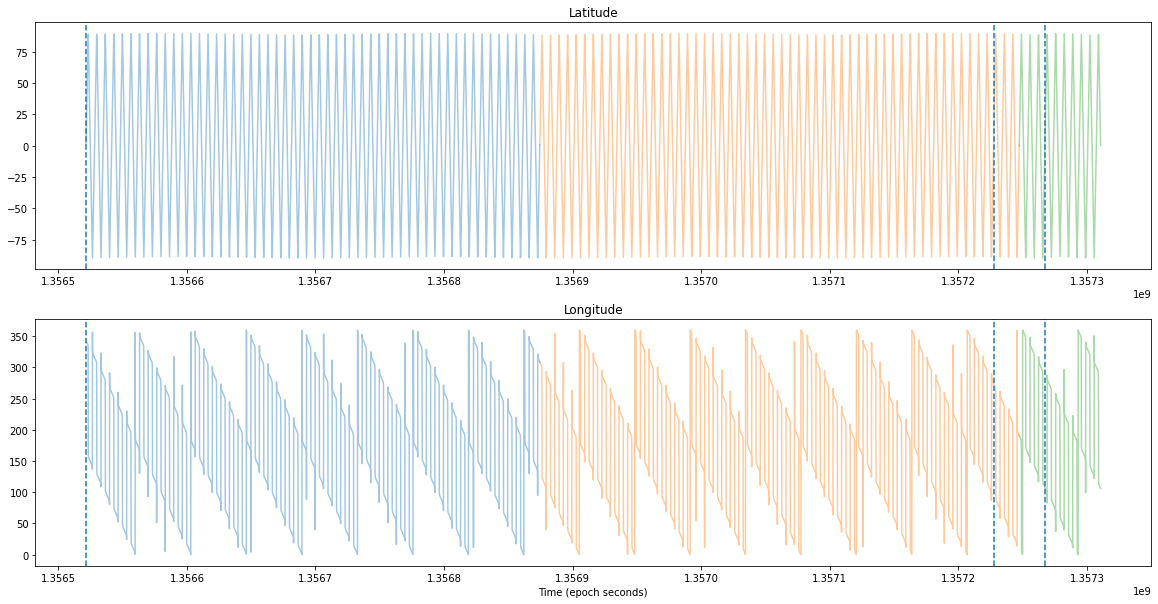

In [4]:
test_demo_plots(list(all_ids)[-3001], 2)

In the above plots the different colors represent data that comes from different TLEs. The dotted lines are the time that the TLE epoch times. This shows two important things:
* that the latitude and longitude are interploated smoothly between element sets
* that the times of "switching" between one element set and another are spaced to minimize epoch distance